
# 01 - Exploración del dataset

Guía: cargar datos, estadísticas básicas y al menos 3 visualizaciones.


In [1]:

%matplotlib inline
import sys
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar sys.path para importar módulos del repo
ROOT = pathlib.Path.cwd()
if (ROOT / 'config_dataset.py').exists():
    sys.path.append(str(ROOT))
elif (ROOT.parent / 'config_dataset.py').exists():
    ROOT = ROOT.parent
    sys.path.append(str(ROOT))
else:
    raise RuntimeError('No se encontró config_dataset.py')

from config_dataset import DATASET, NUM_ITEMS, get_paths
from src.data.load_data import load_training_data, load_test_data

sns.set_style('whitegrid')
print(f"Dataset seleccionado: {DATASET} ({NUM_ITEMS} items)")


Dataset seleccionado: netflix (752 items)


In [2]:

# Cargar sets de train y test
paths = get_paths()
df_train = load_training_data()
test_users = load_test_data()

print("Train shape:", df_train.shape)
print("Test users:", len(test_users))
print(df_train.head())


Train shape: (16000, 4)
Test users: 1600
   user_id  user_group                                              items  \
0        0           0  [472, 97, 122, 654, 709, 467, 574, 544, 478, 3...   
1        1           0  [431, 445, 367, 100, 743, 739, 263, 426, 321, ...   
2        2           0  [224, 133, 227, 51, 230, 546, 57, 60, 743, 495...   
3        3           0  [338, 80, 210, 618, 468, 320, 351, 411, 575, 2...   
4        4           0  [510, 231, 708, 86, 514, 352, 233, 351, 415, 6...   

                                             ratings  
0  [4.0, 3.0, 4.0, 3.0, 5.0, 4.0, 2.0, 1.0, 4.0, ...  
1  [3.0, 5.0, 5.0, 5.0, 5.0, 3.0, 1.0, 4.0, 5.0, ...  
2  [5.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 5.0, 5.0, ...  
3  [3.0, 5.0, 3.0, 5.0, 2.0, 1.0, 4.0, 3.0, 3.0, ...  
4  [4.0, 2.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, ...  



## Estadísticas básicas
- Número de usuarios, items únicos, interacciones totales.
- Longitud de secuencias (promedio, min, max).
- Distribución de ratings.


In [3]:

# Número de usuarios
num_users = len(df_train)
# Items únicos en train
unique_items = pd.Series(np.concatenate(df_train['items'].values)).nunique()
# Interacciones totales
num_interactions = df_train['items'].apply(len).sum()

# Longitudes de secuencia
seq_lengths = df_train['items'].apply(len)
summary_lengths = seq_lengths.describe()[['mean','min','max']]

# Distribución de ratings
all_ratings = np.concatenate(df_train['ratings'].values)
ratings_counts = pd.value_counts(all_ratings).sort_index()

print(f"Usuarios: {num_users}")
print(f"Items únicos (train): {unique_items}")
print(f"Interacciones totales: {num_interactions}")
print("Longitudes (mean/min/max):", summary_lengths.to_dict())
print("Ratings distribution:\n", ratings_counts)


Usuarios: 16000
Items únicos (train): 752
Interacciones totales: 1797612
Longitudes (mean/min/max): {'mean': 112.35075, 'min': 25.0, 'max': 200.0}
Ratings distribution:
 1.0    249659
2.0    322585
3.0    398913
4.0    442577
5.0    383878
Name: count, dtype: int64


/tmp/ipykernel_1462472/2028084379.py:14: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ratings_counts = pd.value_counts(all_ratings).sort_index()



## Visualizaciones
1. Histograma de longitud de secuencias.
2. Distribución de ratings.
3. Top-20 items más populares.


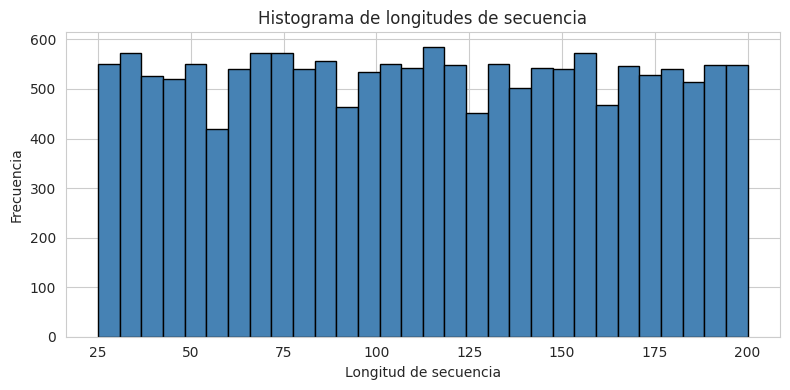

In [4]:

plt.figure(figsize=(8,4))
plt.hist(seq_lengths, bins=30, color='steelblue', edgecolor='black')
plt.xlabel('Longitud de secuencia')
plt.ylabel('Frecuencia')
plt.title('Histograma de longitudes de secuencia')
plt.tight_layout()
plt.show()


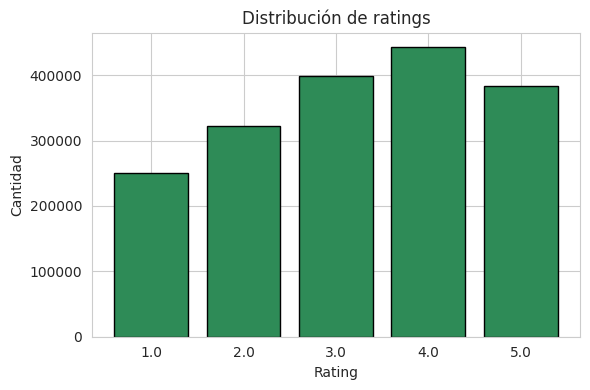

In [5]:

plt.figure(figsize=(6,4))
ratings_order = sorted(ratings_counts.index)
plt.bar([str(r) for r in ratings_order], ratings_counts.loc[ratings_order], color='seagreen', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.title('Distribución de ratings')
plt.tight_layout()
plt.show()


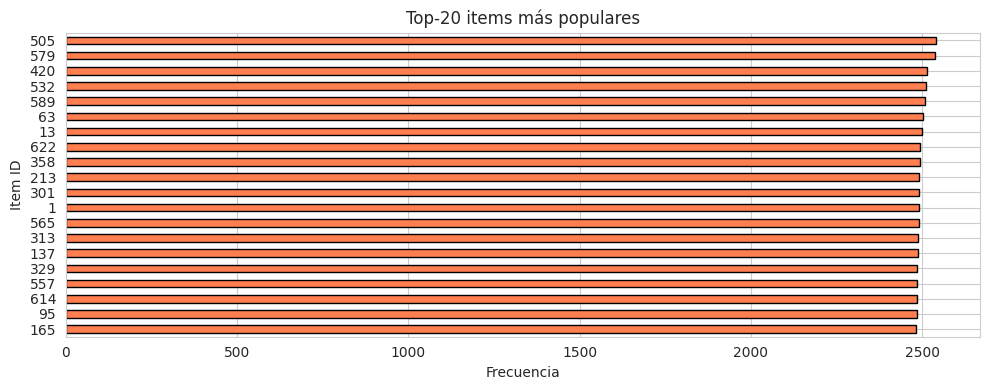

In [6]:

# Popularidad de items (conteo de apariciones en train)
all_items = np.concatenate(df_train['items'].values)
item_counts = pd.Series(all_items).value_counts().head(20)

plt.figure(figsize=(10,4))
item_counts.sort_values().plot(kind='barh', color='coral', edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Item ID')
plt.title('Top-20 items más populares')
plt.tight_layout()
plt.show()



## Guardar dataset procesado (trajectories)
Genera y guarda `data/processed/trajectories_train.pkl` para uso en training.


In [7]:

import pickle
from pathlib import Path
from src.data.preprocessing import create_dt_dataset, validate_preprocessing

# Crear trayectorias completas
trajectories = create_dt_dataset(df_train)
validate_preprocessing(trajectories)

out_path = ROOT / 'data/processed/trajectories_train.pkl'
out_path.parent.mkdir(parents=True, exist_ok=True)
with out_path.open('wb') as f:
    pickle.dump(trajectories, f)

print(f"Guardado: {out_path} (trayectorias: {len(trajectories)})")


Guardado: /home/manu/Documentos/diplo/tp_decision_transformer/data/processed/trajectories_train.pkl (trayectorias: 16000)
